# Program Assignment 3 _ Sang Hwa Lee

#### Research Question:
Which data science tool is more popular in the data science/statistics community pandas or R?

#### Technical Skills:
Learn how to use the Stack Exchange API.

#### Description: 
There are a number of popular data science/statistic tools, including R and Python’s pandas. In this assignment you will investigate the relative popularity of each of these tools by examining the number of related questions posted on Stack Exchange Q&As. In particular you’ll use the Stack Exchange API (Links to an external site.) to get the number of questions which have the tag “pandas” and the number of question which have the tag “R” for three Q&A subcommunities: Stack Overflow (stackoverflow), Cross Validated (stats.stackexchange), and Data Science (datascience.stackexchange) (HINT: you’ll want to look at the API documentation related to tags). In addition, to examining the total number of questions across all three sites with the pandas and R tags, also examine how the three sites differ in the relative number of R and pandas tags. Stack Overflow is a general subcommunity, while Cross Validated is more focused on statistics and Data Science is more focused on data science.

#### Deliverable:


##### Executable Jupyter notebook which presents your final calculations and visualizations. Notebook should include at least the following:

1. Citation for the sources of data and explanation of the data.
2. Data ingestion using API (without a wrapper!)
3. Data wrangling steps with explanation.
4. Final calculations and visualizations. Calculations and visualizations should look at total number of questions per tag across all three subcommunities together and the total number of questions per tag for each subcommunity separately.
5. Explanation of the results and what they mean in terms of the research question.
6. Take-away message, which succinctly makes it, clear what was found and why it matters.
7. A note about the limitations of the data or analyses.


#### Challenges:

How do your results compare to the conclusions drawn using other methods? You’ll need to research articles which discuss the data science tools.
What might be a better method?



## Data Sources

1. **Stack Exchange API**: The [Stack Exchange API](https://api.stackexchange.com/docs) is used to retrieve the number of questions associated with specific tags on different Stack Exchange sites.

2. **Stack Overflow**: [Stack Overflow](https://stackoverflow.com/) is a Q&A site for professional and enthusiast programmers. The tag counts for 'Pandas' and 'R' are retrieved from this site.

3. **Cross Validated (stats.stackexchange)**: [Cross Validated](https://stats.stackexchange.com/) is a Q&A site for people interested in statistics, machine learning, data analysis, data mining, and data visualization. The tag counts for 'Pandas' and 'R' are retrieved from this site.

4. **Data Science (datascience.stackexchange)**: [Data Science Stack Exchange](https://datascience.stackexchange.com/) is a Q&A site for Data science professionals, Machine Learning specialists, and those interested in learning more about the field. The tag counts for 'Pandas' and 'R' are retrieved from this site.

5. Wes, M. (2011, January 1). pandas: a Foundational Python Library for Data Analysis and Statistics. https://www.dlr.de/sc/portaldata/15/resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf 



In [136]:
# Import library

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Function to get tag information

def get_tag_info(tag, site):
    url = f"https://api.stackexchange.com/2.3/tags/{tag}/info"
    params = {
        "site": site
    }

    response = requests.get(url, params=params)
    data = response.json()

    if 'items' in data and len(data['items']) > 0:
        return data['items'][0]['count']
    else:
        return 0


In [138]:
# Set up three sites and two tags, get tag information for each site and tag

sites = ["stackoverflow", "stats.stackexchange", "datascience.stackexchange"]
tags = ["pandas", "R"]

tag_counts = {}

for site in sites:
    for tag in tags:
        tag_counts[(site, tag)] = get_tag_info(tag, site)


In [139]:
# Convert results to data frames

df = pd.DataFrame(tag_counts, index=["count"]).transpose()
df.index.names = ["site", "tag"]
df.reset_index(inplace=True)


In [140]:
# Data wrangling step

# Calculate'Pandas' and 'R' tags by site.
df_pivot = df.pivot(index='site', columns='tag', values='count')

# Calculate the total number of questions for 'Pandas' and 'R' tags and sort them in descending order
df_total = df.groupby('tag').sum().sort_values('count', ascending=False)

# Result
print(df)

                        site     tag   count
0              stackoverflow  pandas  279023
1              stackoverflow       R  489405
2        stats.stackexchange  pandas     165
3        stats.stackexchange       R   28778
4  datascience.stackexchange  pandas    1311
5  datascience.stackexchange       R    1477


In [141]:
print(df_pivot)

tag                             R  pandas
site                                     
datascience.stackexchange    1477    1311
stackoverflow              489405  279023
stats.stackexchange         28778     165


In [142]:
print(df_total)

                                                     site   count
tag                                                              
R       stackoverflowstats.stackexchangedatascience.st...  519660
pandas  stackoverflowstats.stackexchangedatascience.st...  280499


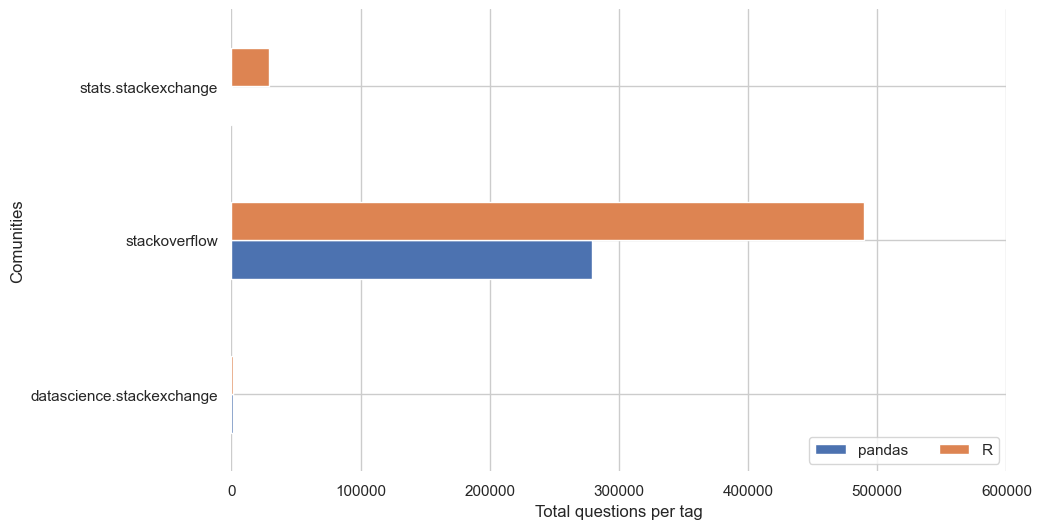

In [143]:
# Set the style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the total questions for 'R' and 'Pandas'
df_pivot[['pandas', 'R']].plot(kind='barh', ax=ax)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Comunities", xlabel="Total questions per tag")
sns.despine(left=True, bottom=True)

# Set the limit for x-axis
ax.set_xlim(0, 600000)

# Show the plot
plt.show()

## Explanation of the results

According to the visualization results, the 'R' tag was used significantly more often than the 'Pandas' tag on both the Stack Overflow and Cross Validated communities. This demonstrates that R is still recognized as an important tool in data analysis and statistics-related questions. In particular, cross-validation sites focused on statistics showed a higher frequency of use of the 'R' tag compared to pandas. On the other hand, on the Data Science Stack Exchange, which focuses on data science, the 'Pandas' and 'R' tags were used almost equally. This indicates that Pandas, a data analysis library in Python, is competing with R in the data science community.

Therefore, as an answer to research questions, "R" is a more popular data science tool than "Pandas". 


## Take-away message

1. Stack Overflow  

    * The number of questions tagged with 'pandas' was <span style= "color:green">279,023</span>, while the number of questions tagged with 'R' was <span style= "color:blue">489,404</span>, indicating that the frequency of 'R' tag usage was approximately <span style= "color:red">1.75</span> times higher than that of 'pandas' tag.

2. Cross Validated 

    * The number of questions tagged with 'pandas' was <span style= "color:green">165</span>, while the number of questions tagged with 'R' was <span style= "color:blue">28,777</span>, indicating that the frequency of 'R' tag usage was approximately <span style= "color:red">174</span> times higher than that of 'pandas' tag.

3. Data Science 

    * The number of questions tagged with 'pandas' was <span style= "color:green">1,311</span>, while the number of questions tagged with 'R' was <span style= "color:blue">1,477</span>, indicating that the frequency of 'R' tag usage was approximately <span style= "color:red">1.13</span> times higher than that of 'pandas' tag.

## Limitation

Data Sampling: 

* The analysis is limited to only three sites, which are Stack Overflow, Cross Validated, and Data Science Stack Exchange. Therefore, the results can only be limited to user behavior on these three sites and not all sites related to data science and statistics.

Time Range: 

* The analysis only considers data from a specific point in time. Therefore, the changes in tag usage patterns over time were not taken into consideration. For instance, analyzing data from the past few years could provide a deeper understanding of how the popularity of Pandas and R has changed over time.

Lack of detailed data:

* Additional information such as the content of the questions, user level, and the number of answers to the questions were not considered. These factors can provide a more in-depth understanding of the usefulness of tags, beyond their usage frequency.



## Challanges

https://www.dlr.de/sc/portaldata/15/resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf

* This research article compares pandas and R, with the author claimed that pandas generally outperforms R in terms of performance. For example, the author measured and compared the execution times of various operations such as data loading, sorting, grouping, joining, and pivoting in "R" and "Pandas". Additionally, the performance differences based on the format and size of data handled by "R" and "Pandas" were analyzed.

* Therefore, I believe that the approach taken in this research article is much better than I attempted.